Степень схожести искомых изображений: 64.18%


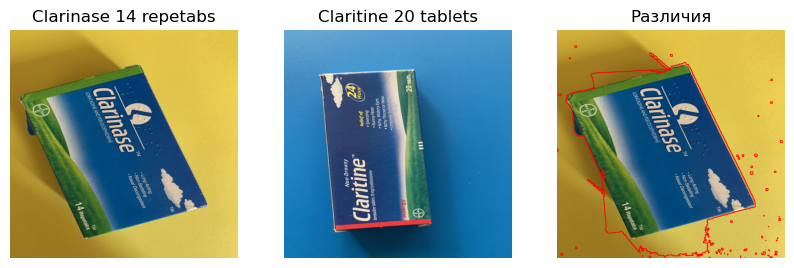

         Folder                  Image  Similarity (%)
21  Clarinase14   iphone xs max 47.JPG          100.00
18  Clarinase14   iphone xs max 45.JPG           72.53
29  Claritine20    samsung a30 539.jpg           70.95
44  Claritine20    samsung a50 543.jpg           70.87
47  Claritine20    samsung a50 546.jpg           69.63
39  Claritine20    samsung a30 540.jpg           69.42
1   Clarinase14     huawei p30 303.jpg           68.88
51  Claritine20    samsung a50 544.jpg           68.84
16  Clarinase14   iphone xs max 48.JPG           68.75
14  Clarinase14     huawei p30 306.jpg           68.62
10  Clarinase14    samsung a30 824.jpg           68.46
37  Claritine20  iphone xs max 361.JPG           68.12
11  Clarinase14     huawei p30 305.jpg           67.98
20  Clarinase14   iphone xs max 46.JPG           67.92
50  Claritine20    samsung a50 545.jpg           67.45
28  Claritine20     huawei p30 836.jpg           67.41
19  Clarinase14   iphone xs max 50.JPG           67.33
26  Clarit

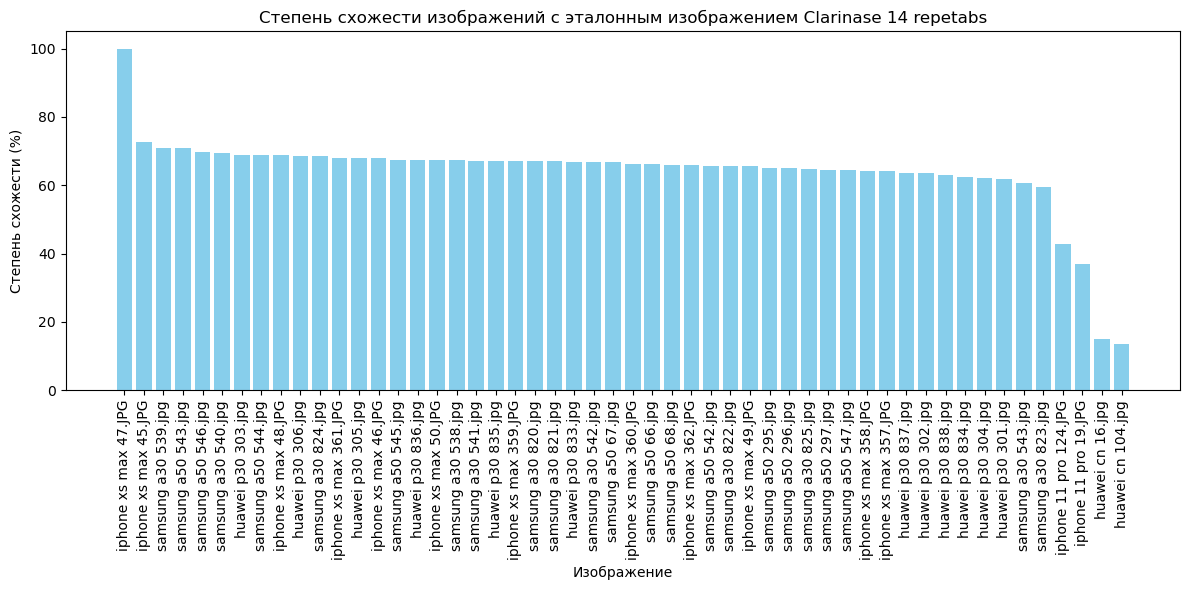

In [1]:
import os
from PIL import Image
import skimage 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Пути к папкам
clarinaze14_path = '/Users/admin/Desktop/Mobile-Captured Pharmaceutical Medication Packages/Clarinase 14 repetabs'
claritine20_path = '//Users/admin/Desktop/Mobile-Captured Pharmaceutical Medication Packages/Claritine 20 tablets'

# Имена выбранных изображений
clarinaze14_image_name = 'iphone xs max 47.JPG'
claritine20_image_name = 'iphone xs max 358.JPG'

# Загрузка изображений
clarinaze14_image = cv2.imread(os.path.join(clarinaze14_path, clarinaze14_image_name))
claritine20_image = cv2.imread(os.path.join(claritine20_path, claritine20_image_name))

def preprocess_image(image_path, size=(800, 800)):
    image = Image.open(image_path).convert('RGB')
    image = image.resize(size)
    return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Применение к выбранным изображениям
clarinaze14_image = preprocess_image(os.path.join(clarinaze14_path, clarinaze14_image_name))
claritine20_image = preprocess_image(os.path.join(claritine20_path, claritine20_image_name))

def calculate_ssim(imageA, imageB):
    # Преобразуем изображения в оттенки серого
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    # Вычисляем SSIM
    score, diff = skimage.metrics.structural_similarity(grayA, grayB, full=True)
    return score * 100, diff

similarity_score, difference = calculate_ssim(clarinaze14_image, claritine20_image)
print(f"Степень схожести искомых изображений: {similarity_score:.2f}%")


def highlight_differences(imageA, imageB, diff, threshold=0.1):
    # Преобразуем разницу в масштаб от 0 до 255
    diff = (diff * 255).astype("uint8")

    # Применяем порог для выделения различий
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Находим контуры различий
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Копируем оригинальные изображения для отображения различий
    annotated_image = imageA.copy()

    # Рисуем контуры на изображении
    cv2.drawContours(annotated_image, contours, -1, (0, 0, 255), 2)

    return annotated_image

annotated_image = highlight_differences(clarinaze14_image, claritine20_image, difference)

# Визуализация
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Clarinase 14 repetabs')
plt.imshow(cv2.cvtColor(clarinaze14_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Claritine 20 tablets')
plt.imshow(cv2.cvtColor(claritine20_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Различия')
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


def compare_with_folder(reference_image, folder_path, folder_name):
    scores = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = preprocess_image(img_path)
            score, _ = calculate_ssim(reference_image, img)
            scores.append({'Folder': folder_name, 'Image': img_name, 'Similarity (%)': round(score, 2)})
    return scores

# Сравнение с папкой Clarinase14
scores_clarinaze14 = compare_with_folder(clarinaze14_image, clarinaze14_path, 'Clarinase14')

# Сравнение с папкой Claritine20
scores_claritine20 = compare_with_folder(clarinaze14_image, claritine20_path, 'Claritine20')

# Объединение результатов
all_scores = scores_clarinaze14 + scores_claritine20
df_scores = pd.DataFrame(all_scores)

# Сортировка по степени схожести
df_scores_sorted = df_scores.sort_values(by='Similarity (%)', ascending=False)

# Отображение таблицы
print(df_scores_sorted)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.bar(df_scores_sorted['Image'], df_scores_sorted['Similarity (%)'], color='skyblue')
plt.xlabel('Изображение')
plt.ylabel('Степень схожести (%)')
plt.title('Степень схожести изображений с эталонным изображением Clarinase 14 repetabs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
